In [1]:
idf = {}
with open("ruwac-full.txt.idf") as inp:
    for line in inp:
        w, f = line.decode("utf-8").split()
        idf[w] = float(f)

In [2]:
print idf[u"масло"]
print min(idf.itervalues())
print max(idf.itervalues())

6.5219353397
0.976558162555
18.3025110736


In [4]:
from gensim.models import Word2Vec

w2v = Word2Vec.load("model_lemmas/model.pkl")

In [35]:
contexts = []
with open("contexts/gorshok.txt") as inp:
    for line in inp:
        line = line.decode("utf-8").strip("\n")
        left, w, right = line.split("\t")
        contexts.append(left.split() + right.split())

# contexts = contexts[:1000]

In [36]:
import numpy as np

context_vectors = []
for ctx in contexts:
    ctx_vec = np.zeros(300)
    for w in ctx:
        try:
            ctx_vec += w2v[w]
        except KeyError:
            continue
    ctx_vec /= len(ctx)
    context_vectors.append(ctx_vec)

print context_vectors[0][:10]

[-0.0923762  -0.0499049  -0.0211056   0.00232797  0.00079481  0.07322916
 -0.04227419  0.04597986  0.02395965 -0.01001648]


In [49]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=8, random_state=42)
clf_res = clf.fit_predict(context_vectors)

from collections import Counter
Counter(clf_res)

Counter({0: 1862,
         1: 2976,
         2: 2826,
         3: 6801,
         4: 5429,
         5: 4157,
         6: 2128,
         7: 8009})

In [38]:
# рисуем картинку
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_res = pca.fit_transform(context_vectors)

print pca_res[:10]

[[ 0.04031398 -0.1795338 ]
 [ 0.04030551  0.05398377]
 [-0.25978259  0.07011804]
 [-0.35556676 -0.03762149]
 [ 0.19176924 -0.04152717]
 [ 0.14960703 -0.02103994]
 [ 0.10711464  0.03137844]
 [ 0.21825699  0.01806029]
 [ 0.167388   -0.01113886]
 [ 0.1099479   0.05919341]]


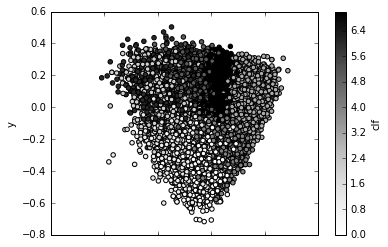

In [39]:
%matplotlib inline

import pandas as pd

df = pd.DataFrame.from_dict({
    "x": pca_res[:,0],
    "y": pca_res[:,1],
    "clf": clf_res,
})
df.plot.scatter(x="x", y="y", c="clf")

In [48]:
sample = [ctx for i, ctx in enumerate(contexts) if clf_res[i] == 1]
print "--" + "\n-- ".join(" ".join(s) for s in sample[:10])

--рекомендовать в поддон горшок класть гравий и немного камень а сверху ставить с орхидея к клубень первый известный европейский орхидея иметь форма похожий на
-- менее сутки в открытый сосуд водопроводный вода можно также постучать по стенка во время такой душ укрывать почва в горшок от попадание неотстоять водопроводный
-- также постучать по стенка горшок во время такой душ укрывать почва в от попадание неотстоять водопроводный вода на 2 л вода надо взять сульфат
-- растение именовать петуния это веселенький и коротенький перерождение начинаться с то что со я оказываться безо всякий опора на высота триста миля от поверхность
-- приближение порошок очевидно очищать жидкость ибо когда старик становиться переливать ее из в бутылка она быть уже не желтый цвет а прозрачный как вода
-- прямо от уровень земля а между то если подбирать этот растение красивый да размещать он на подоконник или перед окно хороший солитерный растение трудно
-- высота такой растеньице нужно осторожно выкапывать и